In [19]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Dataset**

In [20]:
# Read the data from file. 
df = pd.read_csv('/content/drive/MyDrive/Msc Project/Predicting the Length of stay of patients for healthcare facility management./host_train.csv')

In [21]:
# View the contents of dataset
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [22]:
df.info() # It gives the data type information of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

The dataset has total of 18 columns with Data type  integer, float and object.

# **Exploratory Data Analysis**

**Univariate Analysis**

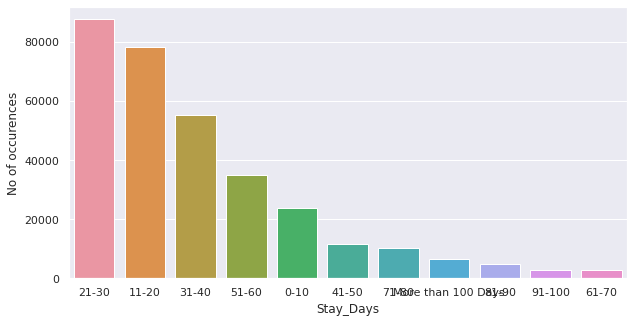

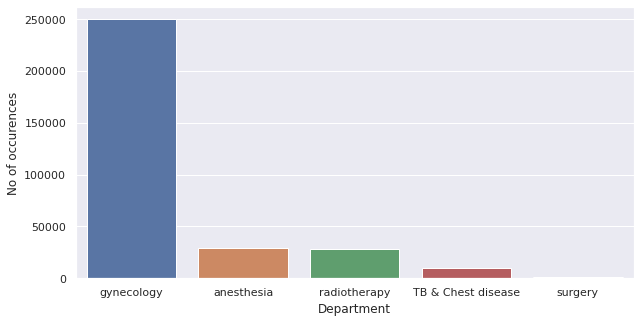

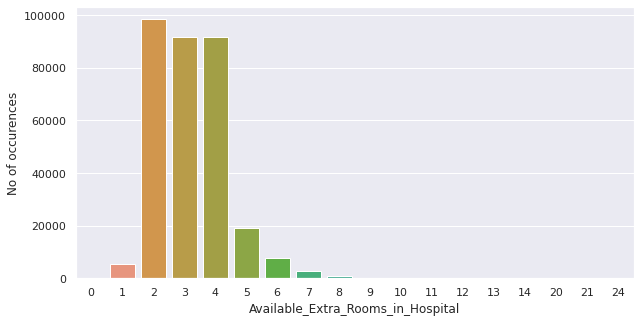

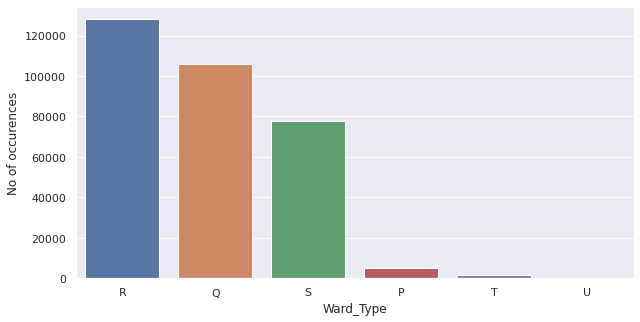

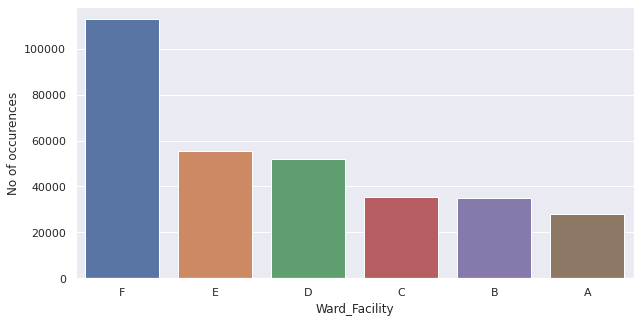

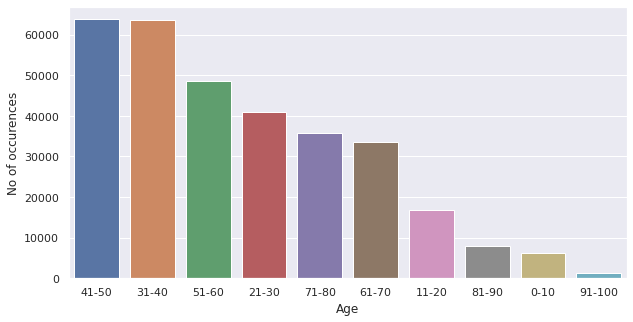

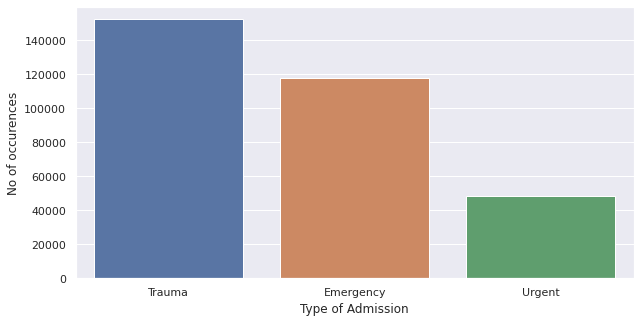

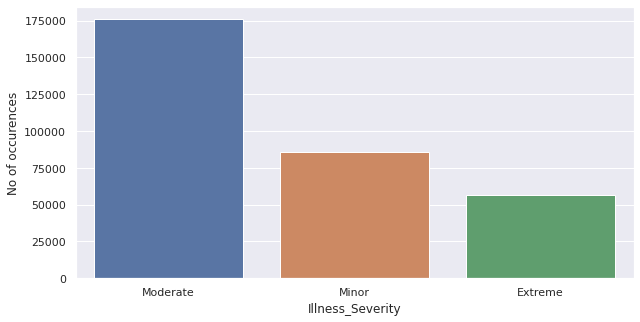

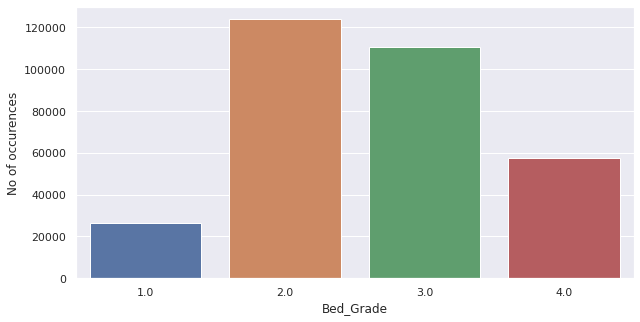

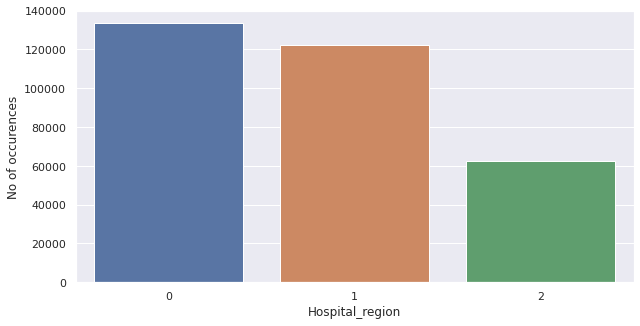

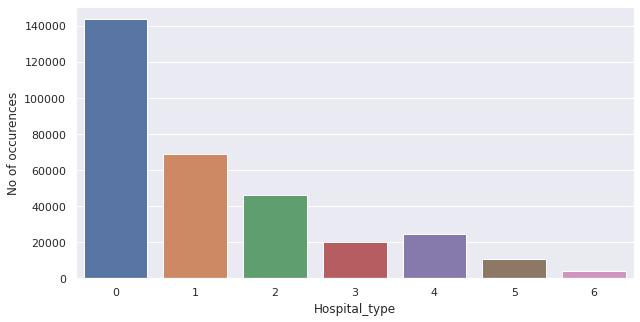

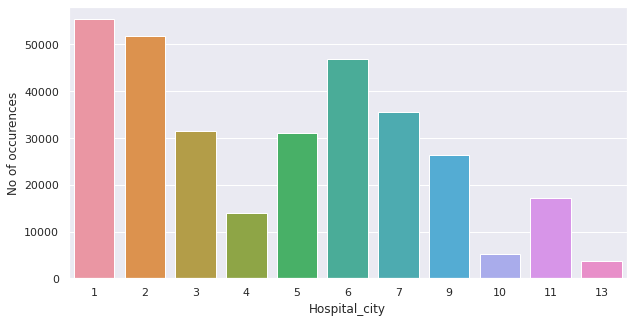

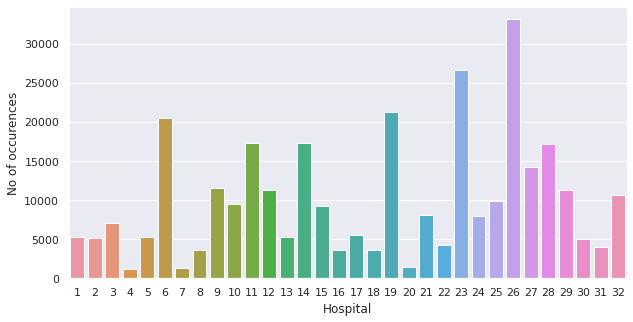

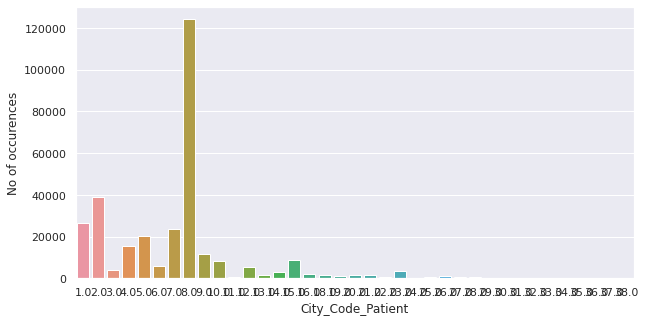

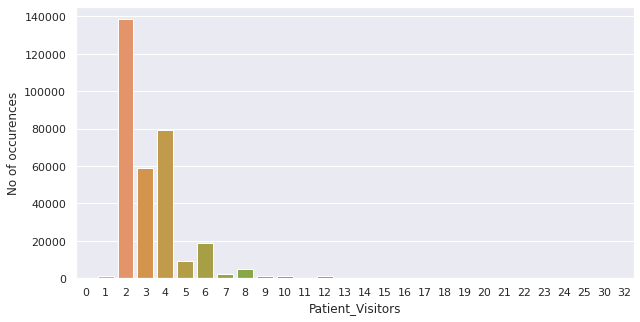

In [23]:
for i in [ 'Stay_Days', 'Department', 'Available_Extra_Rooms_in_Hospital', 'Ward_Type' ,'Ward_Facility', 'Age', 
          'Type of Admission', 'Illness_Severity', 'Bed_Grade', 'Hospital_region', 'Hospital_type' ,  
          'Hospital_city', 'Hospital', 'City_Code_Patient', 'Patient_Visitors']:
            count = df[i].value_counts()

            plt.figure(figsize=(10,5))

            sns.barplot(x=count.index.values, y=count.values,data=df)            
            plt.xlabel(i)
            plt.ylabel('No of occurences')

**Bivariate Analysis**

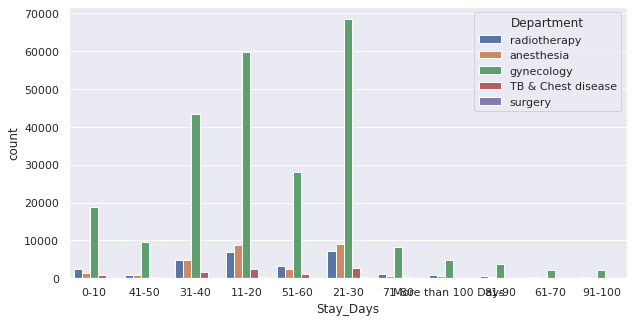

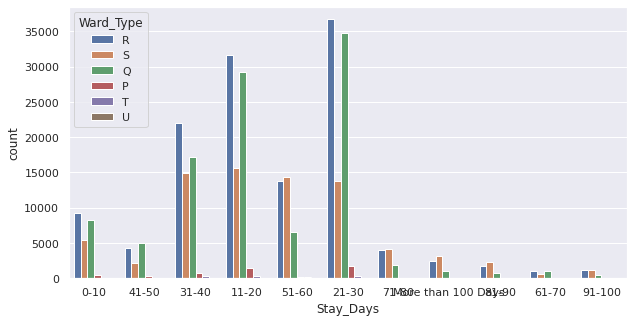

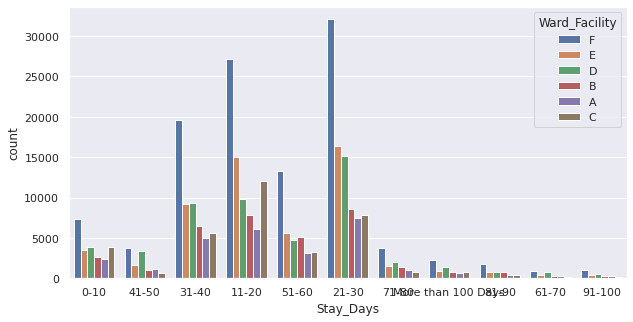

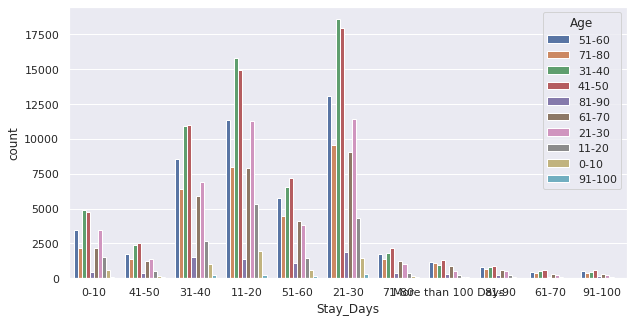

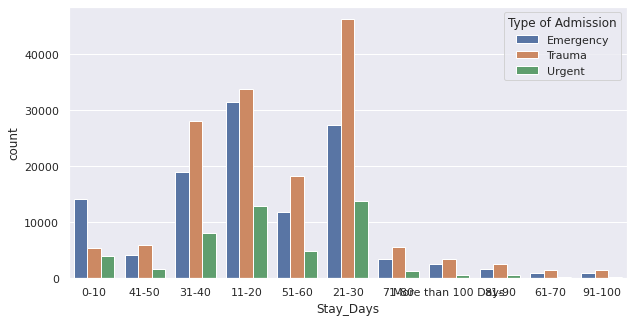

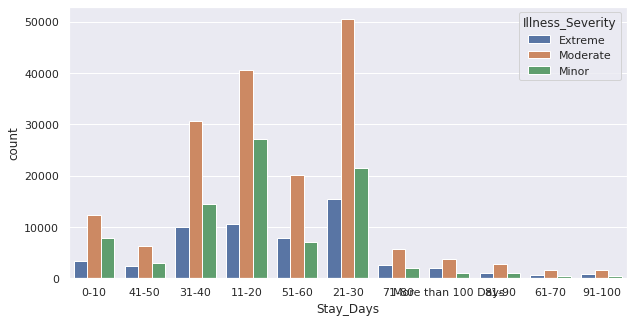

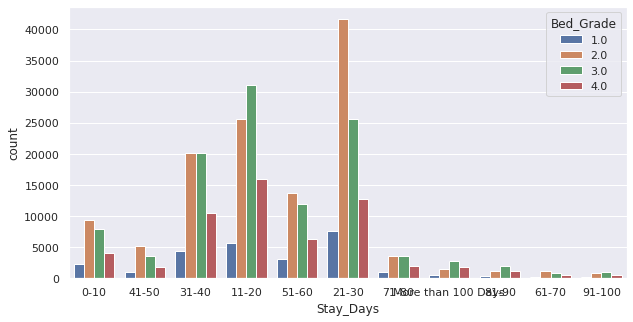

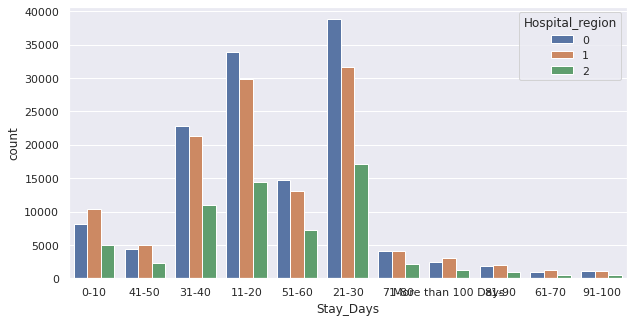

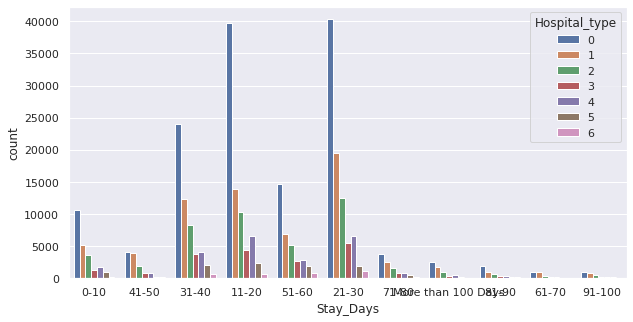

In [24]:
for i in [ 'Department', 'Ward_Type' ,'Ward_Facility', 'Age', 'Type of Admission', 'Illness_Severity', 
          'Bed_Grade', 'Hospital_region', 'Hospital_type' ]:

            plt.figure(figsize=(10,5))

            sns.countplot(x='Stay_Days',hue=i,data=df)

**Distribution of Stay Days**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


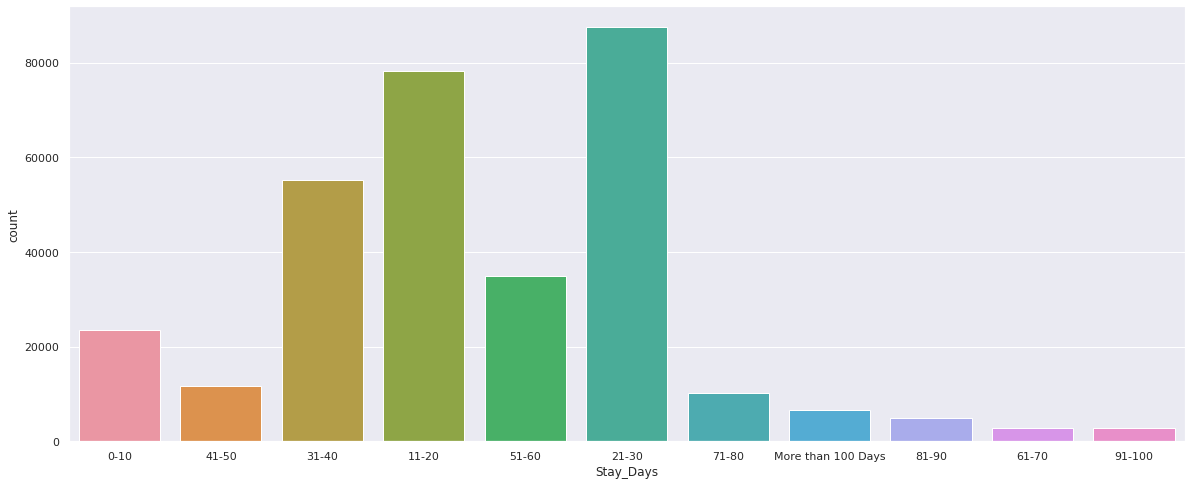

In [25]:
plt.figure(figsize=(20, 8))
sns.countplot(df['Stay_Days'])

The above graph shows that mostly patients stay in the hospital for 21 to 30 days.

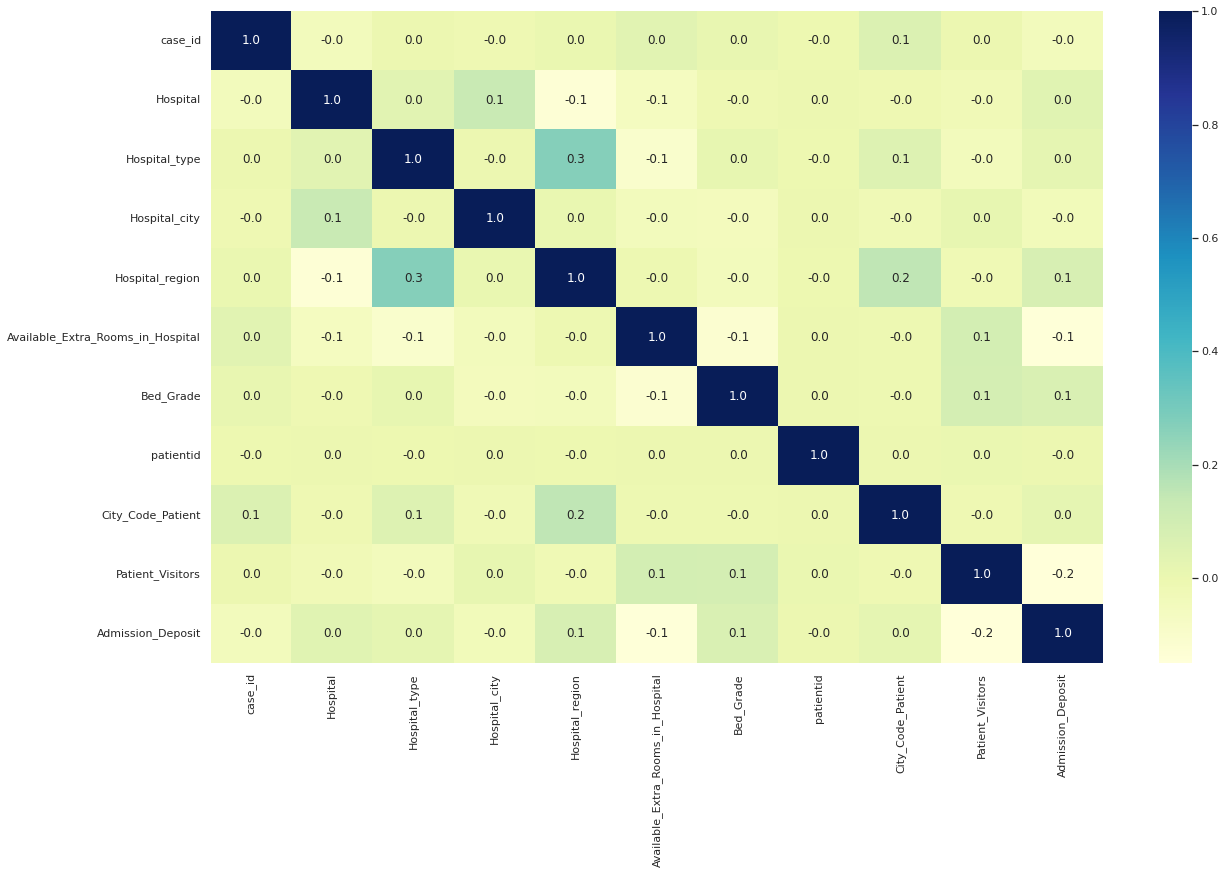

In [26]:
# Plot the correlation between data columns
correlations = df.corr()
sns.heatmap(correlations, annot=True, fmt=".1f", cmap="YlGnBu")

Because some colums of this dataset are categorical. The above graph shows the correlation of only numerical variables.

# **Data Preprocessing**

**Check missing values**

In [27]:
df.isna().sum() # It will show the missing values in each colums.

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

So only 'Bed_Grade' and 'City_Code_Patient' have few values missing. Lets check their percentage with respect to size of dataset.

In [28]:
df.isnull().sum() * 100 / len(df) # Percenatge of missing values

case_id                              0.000000
Hospital                             0.000000
Hospital_type                        0.000000
Hospital_city                        0.000000
Hospital_region                      0.000000
Available_Extra_Rooms_in_Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility                        0.000000
Bed_Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Illness_Severity                     0.000000
Patient_Visitors                     0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay_Days                            0.000000
dtype: float64

In [29]:
# Since percentage of missing values is less than 2%. Lets simply drop them.
df = df.dropna()

# **Encoding**

In [30]:
# Get categorical features of the data
cat_features = [i for i in df.columns if df[i].dtypes=='object'] 
print(cat_features)

['Department', 'Ward_Type', 'Ward_Facility', 'Type of Admission', 'Illness_Severity', 'Age', 'Stay_Days']


In [31]:
# Analyse the categories in details 
da = pd.DataFrame(columns=['Feature','Unique feature Values','Number of categories'])
c = []
u = []
n = []
for i in cat_features:
    c.append(i)
    u.append(df[i].unique())
    n.append(df[i].unique().size)
    
da['Feature'] = c
da['Unique feature Values'] = u
da['Number of categories'] = n

# Print the results of analysis
da

,Feature,Unique feature Values,Number of categories
0,Department,"[radiotherapy, anesthesia, gynecology, TB & Ch...",5
1,Ward_Type,"[R, S, Q, P, T, U]",6
2,Ward_Facility,"[F, E, D, B, A, C]",6
3,Type of Admission,"[Emergency, Trauma, Urgent]",3
4,Illness_Severity,"[Extreme, Moderate, Minor]",3
5,Age,"[51-60, 71-80, 31-40, 41-50, 81-90, 61-70, 21-...",10
6,Stay_Days,"[0-10, 41-50, 31-40, 11-20, 51-60, 21-30, 71-8...",11


In [32]:
# Use sklearn package 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
he = OneHotEncoder()

ordinal_feat = ['Type of Admission', 'Illness_Severity', 'Age', 'Stay_Days']
nord_feat = ['Department', 'Ward_Type', 'Ward_Facility']


# Apply label encoding to ordinal features
for j in ordinal_feat:
    df[j]  = le.fit_transform(df[j].astype(str))
    mapp = dict(zip(le.classes_, le.transform(le.classes_)))
    print("\n Encoding for",j,'\n')
    print(mapp)
    
    
# Apply one hot encoding to non-ordinal features
df = pd.get_dummies(df, columns=nord_feat)


 Encoding for Type of Admission 

{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}

 Encoding for Illness_Severity 

{'Extreme': 0, 'Minor': 1, 'Moderate': 2}

 Encoding for Age 

{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

 Encoding for Stay_Days 

{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [33]:
print('Dataset after encoding')
df

Dataset after encoding


,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Type of Admission,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_A,Ward_Facility_B,Ward_Facility_C,Ward_Facility_D,Ward_Facility_E,Ward_Facility_F
0,1,8,2,3,2,3,2.0,31397,7.0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,2,2,5,2,2,2.0,31397,7.0,1,...,0,1,0,0,0,0,0,0,0,1
2,3,10,4,1,0,2,2.0,31397,7.0,1,...,0,1,0,0,0,0,0,0,1,0
3,4,26,1,2,1,2,2.0,31397,7.0,1,...,1,0,0,0,0,0,0,1,0,0
4,5,26,1,2,1,2,2.0,31397,7.0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,4.0,86499,23.0,0,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,0,1,0,2,4.0,325,8.0,2,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,0,4,0,3,4.0,125235,10.0,0,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,1,2,1,3,3.0,91081,8.0,1,...,0,0,0,0,0,0,0,1,0,0
